In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.tree import export_graphviz

In [48]:
features = pd.read_csv('vlagunr-Cyano.csv')

In [49]:
features.head(155)

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,TN/TP,Fe,SiO4Si,ChlorophyceaeBiomassC,DiatomsBiomassC,PicoplanktonBiomassC,Windspeedinsitu,Depth,DIN to DIP,CyanobacteriaBiomassC
0,3.758,9.46,18.3,52.00,3.5,11.7,185.0,0.039,0.022,0.551,...,6.848,0.012,2.311,0.508,0.018,0.691,3.5,3.3,17.429,0.429
1,3.505,9.89,19.1,50.00,4.4,17.5,111.3,0.020,0.025,0.123,...,10.128,0.014,2.116,0.473,0.001,0.522,0.0,3.6,10.227,1.085
2,3.758,9.66,18.1,59.00,3.2,22.8,103.4,0.016,0.008,0.582,...,9.134,0.037,2.264,0.271,0.021,0.538,1.0,3.4,7.500,1.734
3,3.107,10.36,19.5,46.00,4.3,22.3,92.7,0.026,0.021,0.693,...,11.978,0.017,2.262,0.458,0.122,0.655,0.0,2.9,10.930,0.814
4,2.619,11.56,19.0,42.00,11.7,30.3,73.2,0.022,0.048,0.383,...,12.665,0.024,2.216,0.328,0.085,0.182,0.0,3.0,5.983,1.133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,3.700,9.86,16.2,112.50,9.7,21.4,186.3,0.040,0.052,0.838,...,7.157,0.040,2.953,0.465,0.176,1.162,7.0,3.1,9.485,1.364
151,4.500,9.93,16.3,117.50,23.9,30.3,191.5,0.033,0.029,0.406,...,6.711,0.050,2.904,0.381,0.153,0.845,8.5,3.2,2.594,0.900
152,4.600,10.02,16.2,115.00,31.4,32.4,37.8,0.024,0.024,0.549,...,10.561,0.031,2.665,0.246,0.116,0.848,10.2,3.3,1.529,0.971
153,4.500,9.93,16.3,113.75,7.1,20.6,223.2,0.021,0.032,0.482,...,5.369,0.019,2.967,0.129,0.164,0.529,9.5,3.4,7.465,0.679


In [50]:
print(f'The shape of out feature is: {features.shape}')

The shape of out feature is: (156, 21)


In [51]:
features.describe()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,TN/TP,Fe,SiO4Si,ChlorophyceaeBiomassC,DiatomsBiomassC,PicoplanktonBiomassC,Windspeedinsitu,Depth,DIN to DIP,CyanobacteriaBiomassC
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,3.356955,10.180705,17.350000,86.937115,15.035256,22.421154,134.547436,0.029429,0.037071,0.573897,...,8.578487,0.032135,2.586397,0.592468,0.111782,0.619397,4.985897,3.023718,7.885410,0.709897
std,0.758863,1.078504,3.122251,35.506823,11.841528,19.531893,51.210224,0.017682,0.020047,0.173958,...,2.502329,0.020844,0.693842,0.308659,0.118384,0.338192,2.621043,0.537961,8.516169,0.530361
min,1.400000,7.620000,10.600000,29.000000,0.100000,0.700000,20.900000,0.002000,0.007000,0.022000,...,1.154000,0.002000,0.796000,0.104000,0.001000,0.080000,0.000000,1.500000,0.813000,0.016000
25%,2.800000,9.367500,16.200000,60.000000,7.475000,9.000000,99.950000,0.019000,0.024000,0.486000,...,6.821750,0.019000,2.190000,0.374000,0.029500,0.348000,3.000000,2.700000,3.132750,0.245000
50%,3.379000,9.955000,17.900000,80.000000,12.250000,15.750000,131.500000,0.026000,0.032000,0.570500,...,8.391000,0.027000,2.645500,0.535000,0.075000,0.608000,5.000000,3.200000,5.245000,0.632500
75%,3.957000,10.890000,20.100000,111.562500,19.875000,30.825000,167.700000,0.035000,0.044250,0.699250,...,10.085250,0.038250,2.919250,0.764250,0.145750,0.861750,6.850000,3.400000,8.486500,1.023000
max,4.600000,12.890000,20.700000,217.500000,88.200000,91.100000,285.100000,0.106000,0.142000,0.975000,...,20.134000,0.163000,4.227000,1.968000,0.765000,1.387000,11.500000,3.900000,49.091000,2.862000


In [52]:
labels = np.array(features['CyanobacteriaBiomassC'])
features = features.drop('CyanobacteriaBiomassC', axis=1)
feature_list = list(features.columns)
features = np.array(features)

In [53]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42)

In [54]:
print(f'Training Features Shape: {train_features.shape}')
print(f'Training Labels Shape: {train_labels.shape}')
print(f'Testing Features Shape: {test_features.shape}')
print(f'Testing Labels Shape: {test_labels.shape}')

Training Features Shape: (109, 20)
Training Labels Shape: (109,)
Testing Features Shape: (47, 20)
Testing Labels Shape: (47,)


In [55]:
baseline_preds = test_features[:,feature_list.index('temp.')]
baseline_errors = abs(baseline_preds - test_labels)
print(f'temp. baseline error: {round(np.mean(baseline_errors), 3)}')

temp. baseline error: 16.729


In [56]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [57]:
predictions_test = rf.predict(test_features)
predictions_train = rf.predict(train_features)

errors_test = abs(predictions_test - test_labels)
errors_train = abs(predictions_train - train_labels)

print(f'Test dataset Mean Absolute Error: {round(np.mean(errors_test), 5)} degrees')
print(f'Train dataset Mean Absolute Error: {round(np.mean(errors_train), 5)} degrees')

Test dataset Mean Absolute Error: 0.33627 degrees
Train dataset Mean Absolute Error: 0.10398 degrees


In [58]:
test_labels.mean()
train_labels.mean()

ratio_test = 100 * (np.mean(errors_test) / test_labels.mean())
ratio_train = 100 * (np.mean(errors_train) / train_labels.mean())

print(f'Test dataset MAE/mean Ratio: {round(ratio_test, 5)} %')
print(f'Train dataset MAE/mean Ratio: {round(ratio_train, 5)} %')

Test dataset MAE/mean Ratio: 47.14686 %
Train dataset MAE/mean Ratio: 14.67651 %


In [59]:
mse_test = mean_squared_error(test_labels, predictions_test)
mse_train = mean_squared_error(train_labels, predictions_train)

print(f'Test dataset Mean Squared Error: {round(mse_test, 5)} degrees')
print(f'Train dataset Mean Squared Error: {round(mse_train, 5)} degrees')

Test dataset Mean Squared Error: 0.24026 degrees
Train dataset Mean Squared Error: 0.02238 degrees


In [60]:
EVS_test = 100 * (explained_variance_score(test_labels, predictions_test))
EVS_train = 100 * (explained_variance_score(train_labels, predictions_train))

print(f'Test dataset Explained Variance Score: {round(EVS_test, 5)} %')
print(f'Train dataset Explained Variance Score: {round(EVS_train, 5)} %')

Test dataset Explained Variance Score: 15.16741 %
Train dataset Explained Variance Score: 91.97899 %


In [61]:
mape_test = 100 * (errors_test / test_labels)
mape_train = 100 * (errors_train / train_labels)

print(f'Test dataset MAPE: {round(np.mean(mape_test), 3)} %')
print(f'Train dataset MAPE: {round(np.mean(mape_train), 3)} %')

Test dataset MAPE: 64.329 %
Train dataset MAPE: 28.842 %


In [62]:
accuracy_test = 100 - np.mean(mape_test)
accuracy_train = 100 - np.mean(mape_train)

print(f'Test dataset Accuracy: {round(accuracy_test, 2)} %')
print(f'Train dataset Accuracy: {round(accuracy_train, 2)} %')

Test dataset Accuracy: 35.67 %
Train dataset Accuracy: 71.16 %


In [63]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
[print(f'Variable: {pair[0]:31} Impportance: {pair[1]}') for pair in feature_importances];

Variable: NO3N                            Impportance: 0.176
Variable: PN                              Impportance: 0.148
Variable: NH4N                            Impportance: 0.103
Variable: PSU                             Impportance: 0.102
Variable: PicoplanktonBiomassC            Impportance: 0.073
Variable: DON                             Impportance: 0.06
Variable: O2                              Impportance: 0.049
Variable: temp.                           Impportance: 0.047
Variable: TN/TP                           Impportance: 0.03
Variable: SiO4Si                          Impportance: 0.029
Variable: ChlorophyceaeBiomassC           Impportance: 0.025
Variable: SS                              Impportance: 0.023
Variable: Fe                              Impportance: 0.023
Variable: Windspeedinsitu                 Impportance: 0.019
Variable: DOP                             Impportance: 0.017
Variable: DiatomsBiomassC                 Impportance: 0.017
Variable: PP              

In [64]:
rf_most_important = RandomForestRegressor(n_estimators=1000, random_state=42)
important_indices = [feature_list.index('NO3N'), feature_list.index('PN')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

In [65]:
rf_most_important.fit(train_important, train_labels)

predictions_test_important = rf_most_important.predict(test_important)
predictions_train_important = rf_most_important.predict(train_important)

errors_test_important = abs(predictions_test_important - test_labels)
errors_train_important = abs(predictions_train_important - train_labels)

print(f'Test dataset Mean Absolute Error: {round(np.mean(errors_test_important), 5)} degrees')
print(f'Train dataset Mean Absolute Error: {round(np.mean(errors_train_important), 5)} degrees')

Test dataset Mean Absolute Error: 0.48901 degrees
Train dataset Mean Absolute Error: 0.12003 degrees


In [66]:
test_labels.mean()
train_labels.mean()

ratio_test_important = 100 * (np.mean(errors_test_important) / test_labels.mean())
ratio_train_important = 100 * (np.mean(errors_train_important) / train_labels.mean())

print(f'Test dataset MAE/mean Ratio: {round(ratio_test_important, 5)} %')
print(f'Train dataset MAE/mean Ratio: {round(ratio_train_important, 5)} %')

Test dataset MAE/mean Ratio: 68.56291 %
Train dataset MAE/mean Ratio: 16.94272 %


In [67]:
mse_test_important = mean_squared_error(test_labels, predictions_test_important)
mse_train_important = mean_squared_error(train_labels, predictions_train_important)

print(f'Test dataset Mean Squared Error: {round(mse_test_important, 5)} degrees')
print(f'Train dataset Mean Squared Error: {round(mse_train_important, 5)} degrees')

Test dataset Mean Squared Error: 0.39563 degrees
Train dataset Mean Squared Error: 0.02804 degrees


In [68]:
EVS_test_important = 100 * (explained_variance_score(test_labels, predictions_test_important))
EVS_train_important = 100 * (explained_variance_score(train_labels, predictions_train_important))

print(f'Test dataset Explained Variance Score: {round(EVS_test_important, 5)} %')
print(f'Train dataset Explained Variance Score: {round(EVS_train_important, 5)} %')

Test dataset Explained Variance Score: -39.58815 %
Train dataset Explained Variance Score: 89.92171 %


In [69]:
mape_test_important = np.mean(100 * (errors_test_important / test_labels))
mape_train_important = np.mean(100 * (errors_train_important / train_labels))
accuracy_test_important = 100 - mape_test_important
accuracy_train_important = 100 - mape_train_important

print(f'Test dataset Accuracy: {round(accuracy_test_important, 2)} %')
print(f'Train dataset Accuracy: {round(accuracy_train_important, 2)} %')

Test dataset Accuracy: -6.07 %
Train dataset Accuracy: 62.97 %


Text(0.5, 1.0, 'Cumulative Importances')

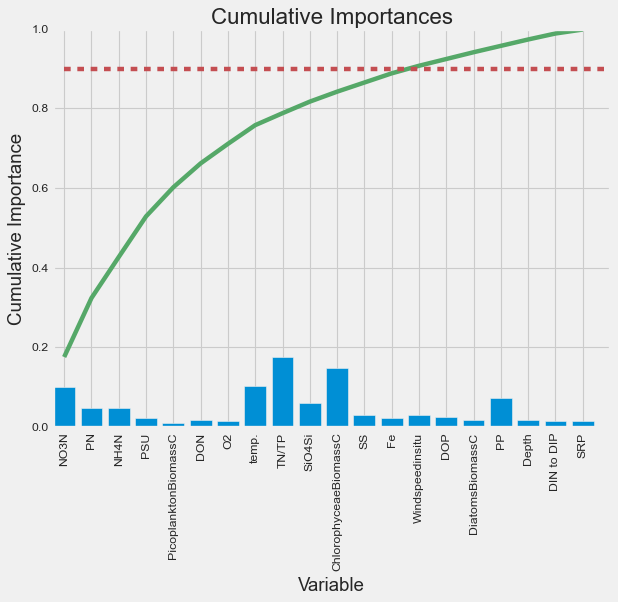

In [70]:
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importances')
plt.xlabel('Variable')
plt.title('Variable Importances')

sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

cumulative_importances = np.cumsum(sorted_importances)

plt.plot(x_values, cumulative_importances, 'g-')
plt.hlines(y=0.9, xmin=0, xmax=len(sorted_importances), color='r', linestyles='dashed')
plt.xticks(x_values, sorted_features, rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

In [71]:
important_feature_names = ['NO3N','PN','NH4N','PSU','PicoplanktonBiomassC','DON','O2','temp.','TN/TP','SiO4Si','ChlorophyceaeBiomassC','SS', 'Fe']

In [72]:
important_indices = [feature_list.index(feature) for feature in important_feature_names]

In [73]:
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

In [74]:
print(f'Important train feature shape: {important_train_features.shape}')
print(f'Important test feature shape: {important_test_features.shape}')

Important train feature shape: (109, 13)
Important test feature shape: (47, 13)


In [75]:
train_features = important_train_features[:]
test_features = important_test_features[:]
feature_list = important_feature_names[:]

In [76]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_features, train_labels)

RandomForestRegressor(random_state=42)

In [77]:
predictions_test = rf.predict(test_features)
predictions_train = rf.predict(train_features)

errors_test = abs(predictions_test - test_labels)
errors_train = abs(predictions_train - train_labels)

print(f'Test dataset Mean Absolute Error: {round(np.mean(errors_test), 5)} degrees')
print(f'Train dataset Mean Absolute Error: {round(np.mean(errors_train), 5)} degrees')

Test dataset Mean Absolute Error: 0.3489 degrees
Train dataset Mean Absolute Error: 0.10417 degrees


In [78]:
test_labels.mean()
train_labels.mean()

ratio_test = 100 * (np.mean(errors_test)/test_labels.mean())
ratio_train = 100 * (np.mean(errors_train)/train_labels.mean())

print(f'Test dataset MAE/mean Ratio: {round(ratio_test, 5)} %')
print(f'Train dataset MAE/mean Ratio: {round(ratio_train, 5)} %')

Test dataset MAE/mean Ratio: 48.91823 %
Train dataset MAE/mean Ratio: 14.7034 %


In [79]:
mse_test = mean_squared_error(test_labels, predictions_test)
mse_train = mean_squared_error(train_labels, predictions_train)

print(f'Test dataset Mean Squared Error: {round(mse_test, 5)} degrees')
print(f'Train dataset Mean Squared Error: {round(mse_train, 5)} degrees')

Test dataset Mean Squared Error: 0.261 degrees
Train dataset Mean Squared Error: 0.02378 degrees


In [80]:
EVS_test = 100 * (explained_variance_score(test_labels, predictions_test))
EVS_train = 100 * (explained_variance_score(train_labels, predictions_train))

print(f'Test dataset Explained Variance Score: {round(EVS_test, 5)} %')
print(f'Train dataset Explained Variance Score: {round(EVS_train, 5)} %')

Test dataset Explained Variance Score: 7.88332 %
Train dataset Explained Variance Score: 91.48464 %


In [81]:
mape_test = 100 * (errors_test / test_labels)
mape_train = 100 * (errors_train / train_labels)

print(f'Test dataset MAPE: {round(np.mean(mape_test), 3)} %')
print(f'Train dataset MAPE: {round(np.mean(mape_train), 3)} %')

Test dataset MAPE: 69.666 %
Train dataset MAPE: 29.283 %


In [82]:
accuracy_test = 100 - np.mean(mape_test)
accuracy_train = 100 - np.mean(mape_train)

print(f'Test dataset Accuracy: {round(accuracy_test, 2)} %')
print(f'Train dataset Accuracy: {round(accuracy_train, 2)} %')

Test dataset Accuracy: 30.33 %
Train dataset Accuracy: 70.72 %


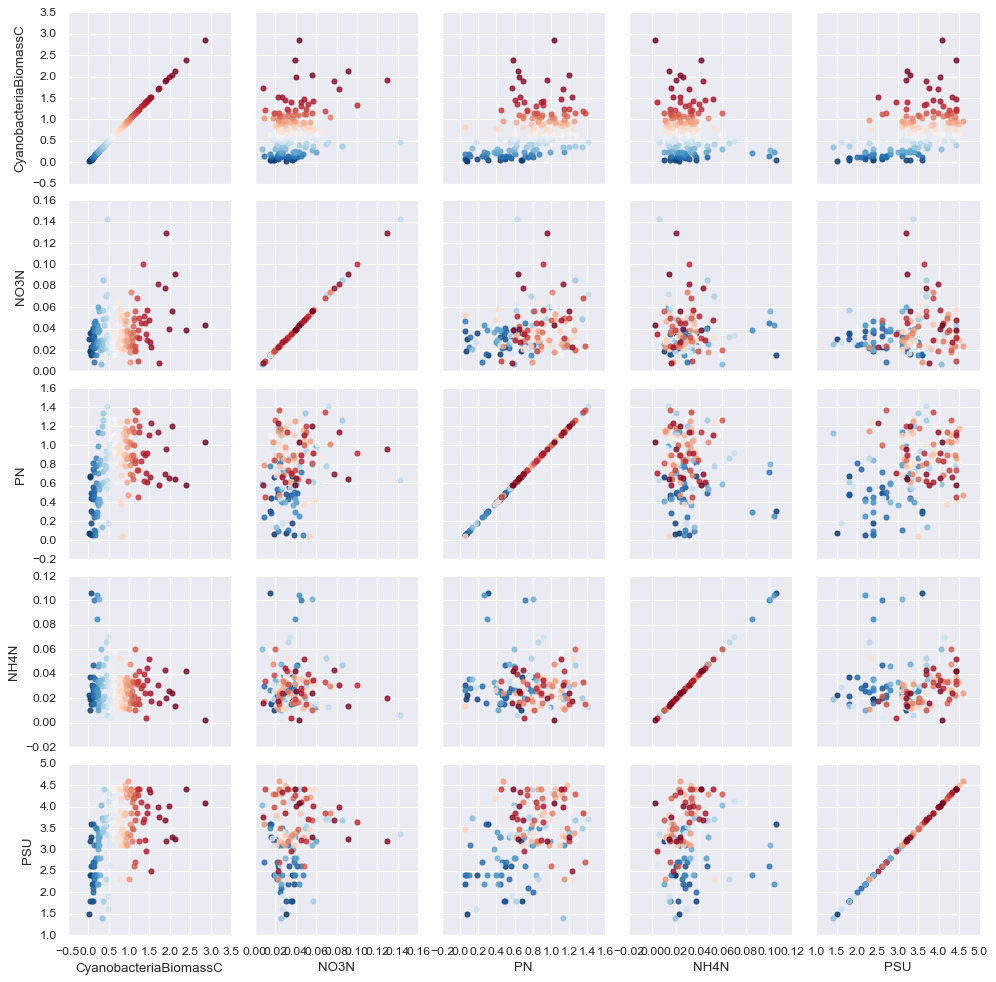

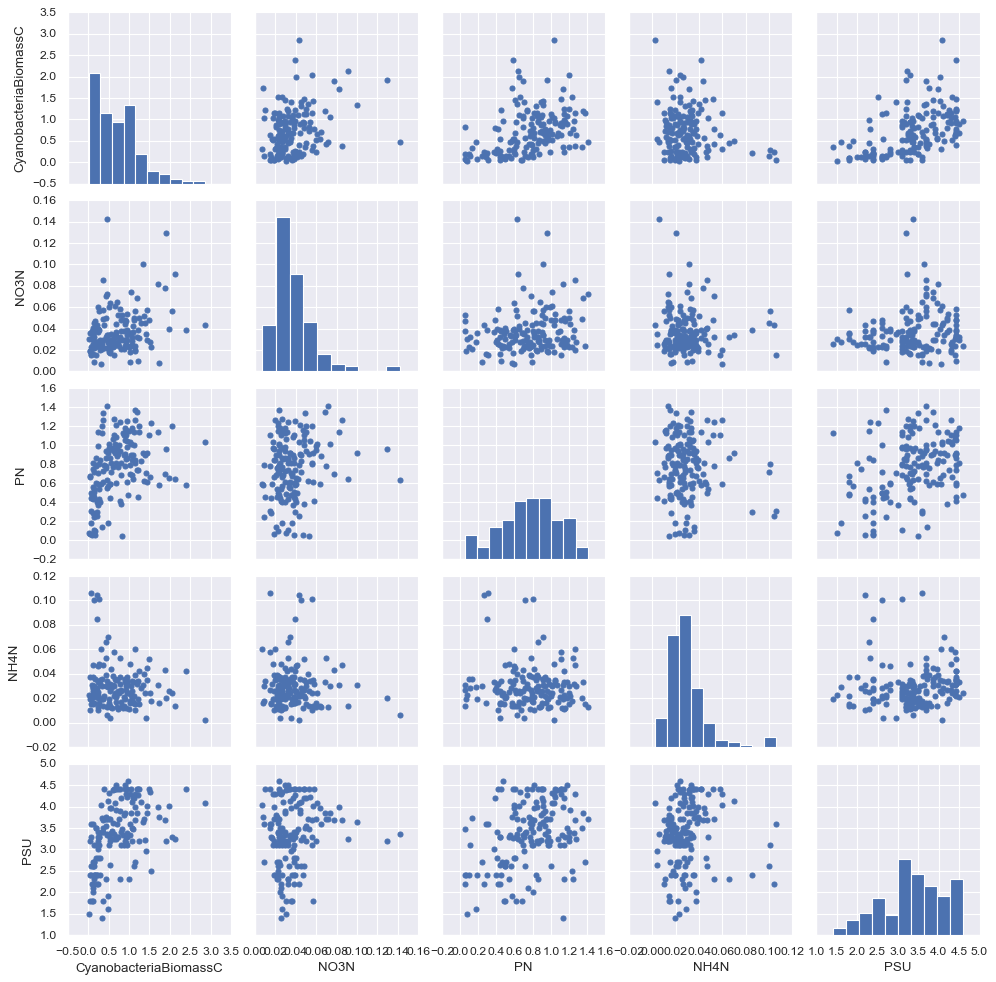

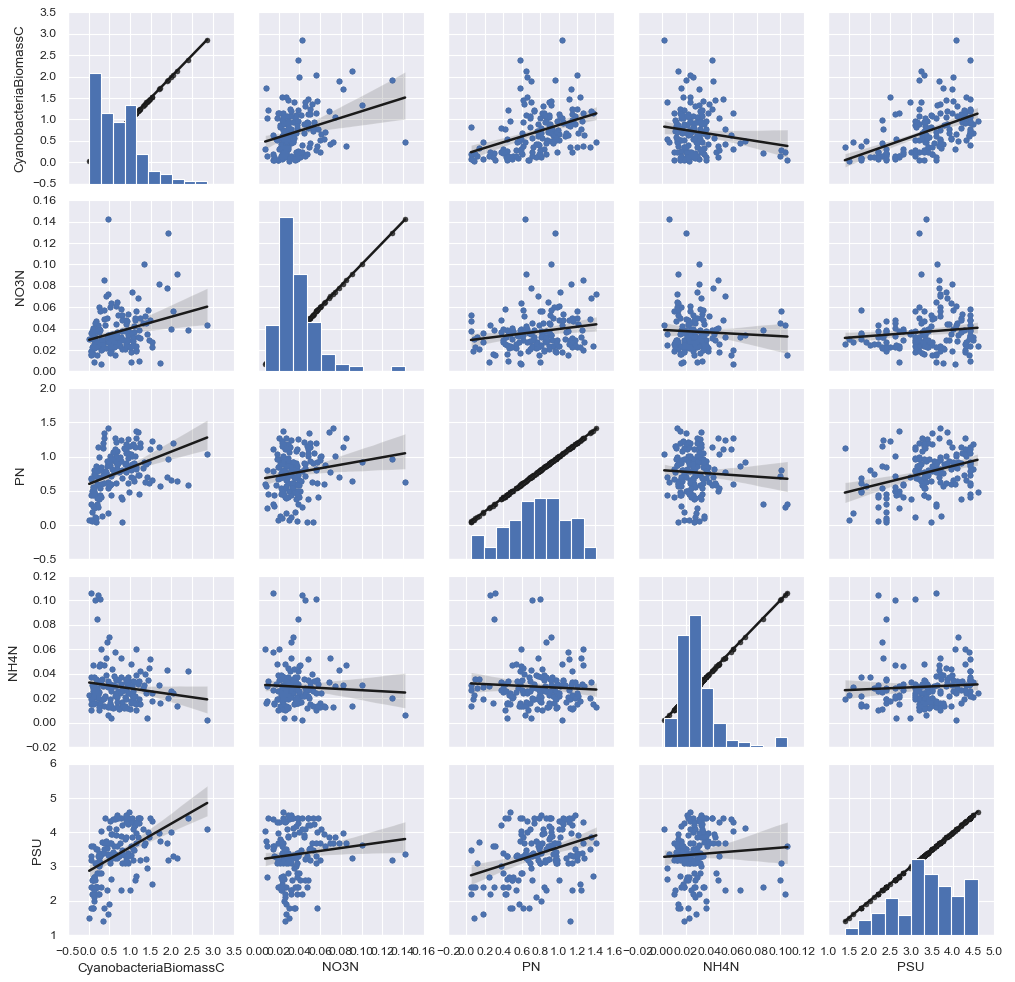

In [83]:
plt.style.use('classic')
sns.set(style='darkgrid')

data = pd.read_csv('vlagunr-Cyano.csv')
data.head()

vars = ['CyanobacteriaBiomassC', 'NO3N', 'PN', 'NH4N', 'PSU']
df = DataFrame(vars, columns=['Column_Name'])
g = sns.PairGrid(data, vars=vars, hue='CyanobacteriaBiomassC', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)

g = sns.PairGrid(data, vars=vars)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

g = sns.PairGrid(data, vars=vars)
g.map(sns.regplot, color='.1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

g.add_legend();

In [84]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth=3, min_samples_leaf=16, random_state=42)
rf_small.fit(train_features, train_labels)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file='small_tree.dot', feature_names=important_feature_names, rounded=True, precision=3)

In [85]:
rf = RandomForestRegressor(random_state=42)

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [86]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
boostrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap':boostrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [87]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\53623\PycharmProjects\WBD\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
61 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\53623\PycharmProjects\WBD\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\53623\PycharmProjects\WBD\.venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\53623\PycharmProjects\WBD\.venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramete

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [88]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    ratio = 100 * (np.mean(errors) / test_labels.mean())
    mse_test = mean_squared_error(test_labels, predictions)
    EVS = 100 * (explained_variance_score(test_labels, predictions))
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Test dataset Model Performance')
    print(f'Test dataset Mean Absolute Error: {round(np.mean(errors), 5)} degrees')
    print(f'Test dataset MAE/mean Ratio: {round(ratio, 5)} %')
    print(f'Test dataset Mean Squared Error: {round(mse_test, 5)} degrees')
    print(f'Test dataset Explained Variance Score: {round(EVS, 5)} %')
    print(f'Test dataset Accuracy: {round(accuracy, 2)} %')

In [89]:
base_model = RandomForestRegressor(n_estimators=10, random_state=42)
base_model.fit(train_features, train_labels)

base_ratio = evaluate(base_model, test_features, test_labels)
base_mse_test = evaluate(base_model, test_features, test_labels)
base_EVS = evaluate(base_model, test_features, test_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

best_random = rf_random.best_estimator_

random_ratio = evaluate(best_random, test_features, test_labels)
random_mse_test = evaluate(best_random, test_features, test_labels)
random_EVS = evaluate(best_random, test_features, test_labels)
random_accuracy = evaluate(best_random, test_features, test_labels)

Test dataset Model Performance
Test dataset Mean Absolute Error: 0.35305 degrees
Test dataset MAE/mean Ratio: 49.49943 %
Test dataset Mean Squared Error: 0.2671 degrees
Test dataset Explained Variance Score: 6.39515 %
Test dataset Accuracy: 37.15 %
Test dataset Model Performance
Test dataset Mean Absolute Error: 0.35305 degrees
Test dataset MAE/mean Ratio: 49.49943 %
Test dataset Mean Squared Error: 0.2671 degrees
Test dataset Explained Variance Score: 6.39515 %
Test dataset Accuracy: 37.15 %
Test dataset Model Performance
Test dataset Mean Absolute Error: 0.35305 degrees
Test dataset MAE/mean Ratio: 49.49943 %
Test dataset Mean Squared Error: 0.2671 degrees
Test dataset Explained Variance Score: 6.39515 %
Test dataset Accuracy: 37.15 %
Test dataset Model Performance
Test dataset Mean Absolute Error: 0.35305 degrees
Test dataset MAE/mean Ratio: 49.49943 %
Test dataset Mean Squared Error: 0.2671 degrees
Test dataset Explained Variance Score: 6.39515 %
Test dataset Accuracy: 37.15 %
Test

In [90]:
def evaluate(model, train_features, train_labels):
    predictions = model.predict(train_features)
    errors = abs(predictions - train_labels)
    ratio = 100 * (np.mean(errors) / test_labels.mean())
    mse_test = mean_squared_error(train_labels, predictions)
    EVS = 100 * (explained_variance_score(train_labels, predictions))
    mape = 100 * np.mean(errors / train_labels)
    accuracy = 100 - mape
    print('Train dataset Model Performance')
    print(f'Train dataset Mean Absolute Error: {round(np.mean(errors), 5)} degrees')
    print(f'Train dataset MAE/mean Ratio: {round(ratio, 5)} %')
    print(f'Train dataset Mean Squared Error: {round(mse_test, 5)} degrees')
    print(f'Train dataset Explained Variance Score: {round(EVS, 5)} %')
    print(f'Train dataset Accuracy: {round(accuracy, 2)} %')

In [91]:
base_model = RandomForestRegressor(n_estimators=10, random_state=42)
base_model.fit(train_features, train_labels)

base_ratio = evaluate(base_model, train_features, train_labels)
base_mse_test = evaluate(base_model, train_features, train_labels)
base_EVS = evaluate(base_model, train_features, train_labels)
base_accuracy = evaluate(base_model, train_features, train_labels)

best_random = rf_random.best_estimator_

random_ratio = evaluate(best_random, train_features, train_labels)
random_mse_test = evaluate(best_random, train_features, train_labels)
random_EVS = evaluate(best_random, train_features, train_labels)
random_accuracy = evaluate(best_random, train_features, train_labels)

Train dataset Model Performance
Train dataset Mean Absolute Error: 0.11947 degrees
Train dataset MAE/mean Ratio: 16.74991 %
Train dataset Mean Squared Error: 0.03676 degrees
Train dataset Explained Variance Score: 86.94643 %
Train dataset Accuracy: 70.48 %
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.11947 degrees
Train dataset MAE/mean Ratio: 16.74991 %
Train dataset Mean Squared Error: 0.03676 degrees
Train dataset Explained Variance Score: 86.94643 %
Train dataset Accuracy: 70.48 %
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.11947 degrees
Train dataset MAE/mean Ratio: 16.74991 %
Train dataset Mean Squared Error: 0.03676 degrees
Train dataset Explained Variance Score: 86.94643 %
Train dataset Accuracy: 70.48 %
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.11947 degrees
Train dataset MAE/mean Ratio: 16.74991 %
Train dataset Mean Squared Error: 0.03676 degrees
Train dataset Explained Variance Score: 86.94643 %
Trai

In [92]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500, 800, 2000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(train_features, train_labels)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 500, 800, 2000]},
             verbose=2)

In [93]:
best_grid = grid_search.best_estimator_ 

In [94]:
grid_ratio = evaluate(best_random, test_features, test_labels) 
grid_mse_test = evaluate(best_random, test_features, test_labels) 
grid_EVS = evaluate(best_random, test_features, test_labels)
grid_accuracy = evaluate(best_grid, test_features, test_labels)

Train dataset Model Performance
Train dataset Mean Absolute Error: 0.31646 degrees
Train dataset MAE/mean Ratio: 44.36949 %
Train dataset Mean Squared Error: 0.19924 degrees
Train dataset Explained Variance Score: 29.71252 %
Train dataset Accuracy: 34.48 %
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.31646 degrees
Train dataset MAE/mean Ratio: 44.36949 %
Train dataset Mean Squared Error: 0.19924 degrees
Train dataset Explained Variance Score: 29.71252 %
Train dataset Accuracy: 34.48 %
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.31646 degrees
Train dataset MAE/mean Ratio: 44.36949 %
Train dataset Mean Squared Error: 0.19924 degrees
Train dataset Explained Variance Score: 29.71252 %
Train dataset Accuracy: 34.48 %
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.32958 degrees
Train dataset MAE/mean Ratio: 46.20963 %
Train dataset Mean Squared Error: 0.20692 degrees
Train dataset Explained Variance Score: 27.13362 %
Trai

In [95]:
grid_ratio = evaluate(best_random, train_features, train_labels) 
grid_mse_test = evaluate(best_random, train_features, train_labels) 
grid_EVS = evaluate(best_random, train_features, train_labels) 
grid_accuracy = evaluate(best_grid, train_features, train_labels)

Train dataset Model Performance
Train dataset Mean Absolute Error: 0.10781 degrees
Train dataset MAE/mean Ratio: 15.1155 %
Train dataset Mean Squared Error: 0.02328 degrees
Train dataset Explained Variance Score: 91.62531 %
Train dataset Accuracy: 68.96 %
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.10781 degrees
Train dataset MAE/mean Ratio: 15.1155 %
Train dataset Mean Squared Error: 0.02328 degrees
Train dataset Explained Variance Score: 91.62531 %
Train dataset Accuracy: 68.96 %
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.10781 degrees
Train dataset MAE/mean Ratio: 15.1155 %
Train dataset Mean Squared Error: 0.02328 degrees
Train dataset Explained Variance Score: 91.62531 %
Train dataset Accuracy: 68.96 %
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.18442 degrees
Train dataset MAE/mean Ratio: 25.85645 %
Train dataset Mean Squared Error: 0.07151 degrees
Train dataset Explained Variance Score: 74.26473 %
Train d